# Term 3 Project
## Linear Regression

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Linear Regression Model](#section4)<br>

## 1. Problem Statement 

Predict price for real estate property based on sq ft, number of beds, batharooms and location suitated for Sacromental Real Estate data. 

In [1]:
import numpy as np                                                 
import pandas as pd                                               
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns   
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

from shapely.geometry import Point
%matplotlib inline
sns.set()

from subprocess import check_output

## 2. Data Loading and Descriotion

In [2]:
df=pd.read_csv('Sacramentorealestatetransactions.csv')

In [3]:
df.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [217]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdp = GeoDataFrame(df, geometry=geometry) # Changed normal DataFrame to GeoDataFrame


In [218]:
gdp.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,geometry
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,POINT (-121.434879 38.631913)
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,POINT (-121.431028 38.47890200000001)
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,POINT (-121.443839 38.618305)
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,POINT (-121.439146 38.61683499999999)
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,POINT (-121.435768 38.51947)


## 3. Exploratory Data Analysis

In [169]:
df.shape

(985, 12)

In [219]:
gdp.shape

(985, 13)

In [224]:
gdp.geom_type.head(5)

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

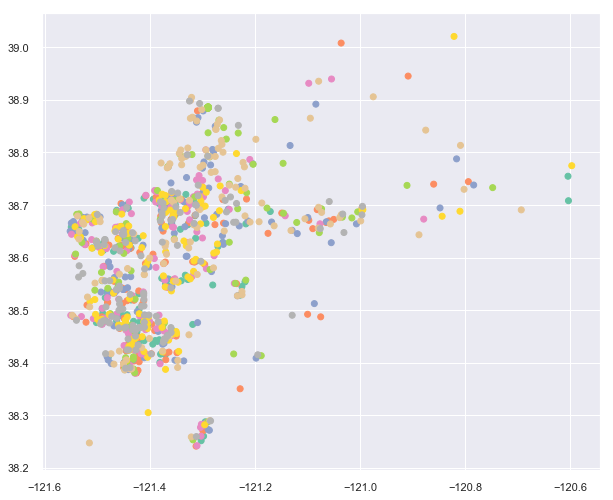

In [223]:
gdp.plot(cmap='Set2', figsize=(10, 10)) 

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [220]:
gdp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 13 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
geometry     985 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 100.1+ KB


In [171]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [172]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [4]:
# Data Profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="sacramento.html")

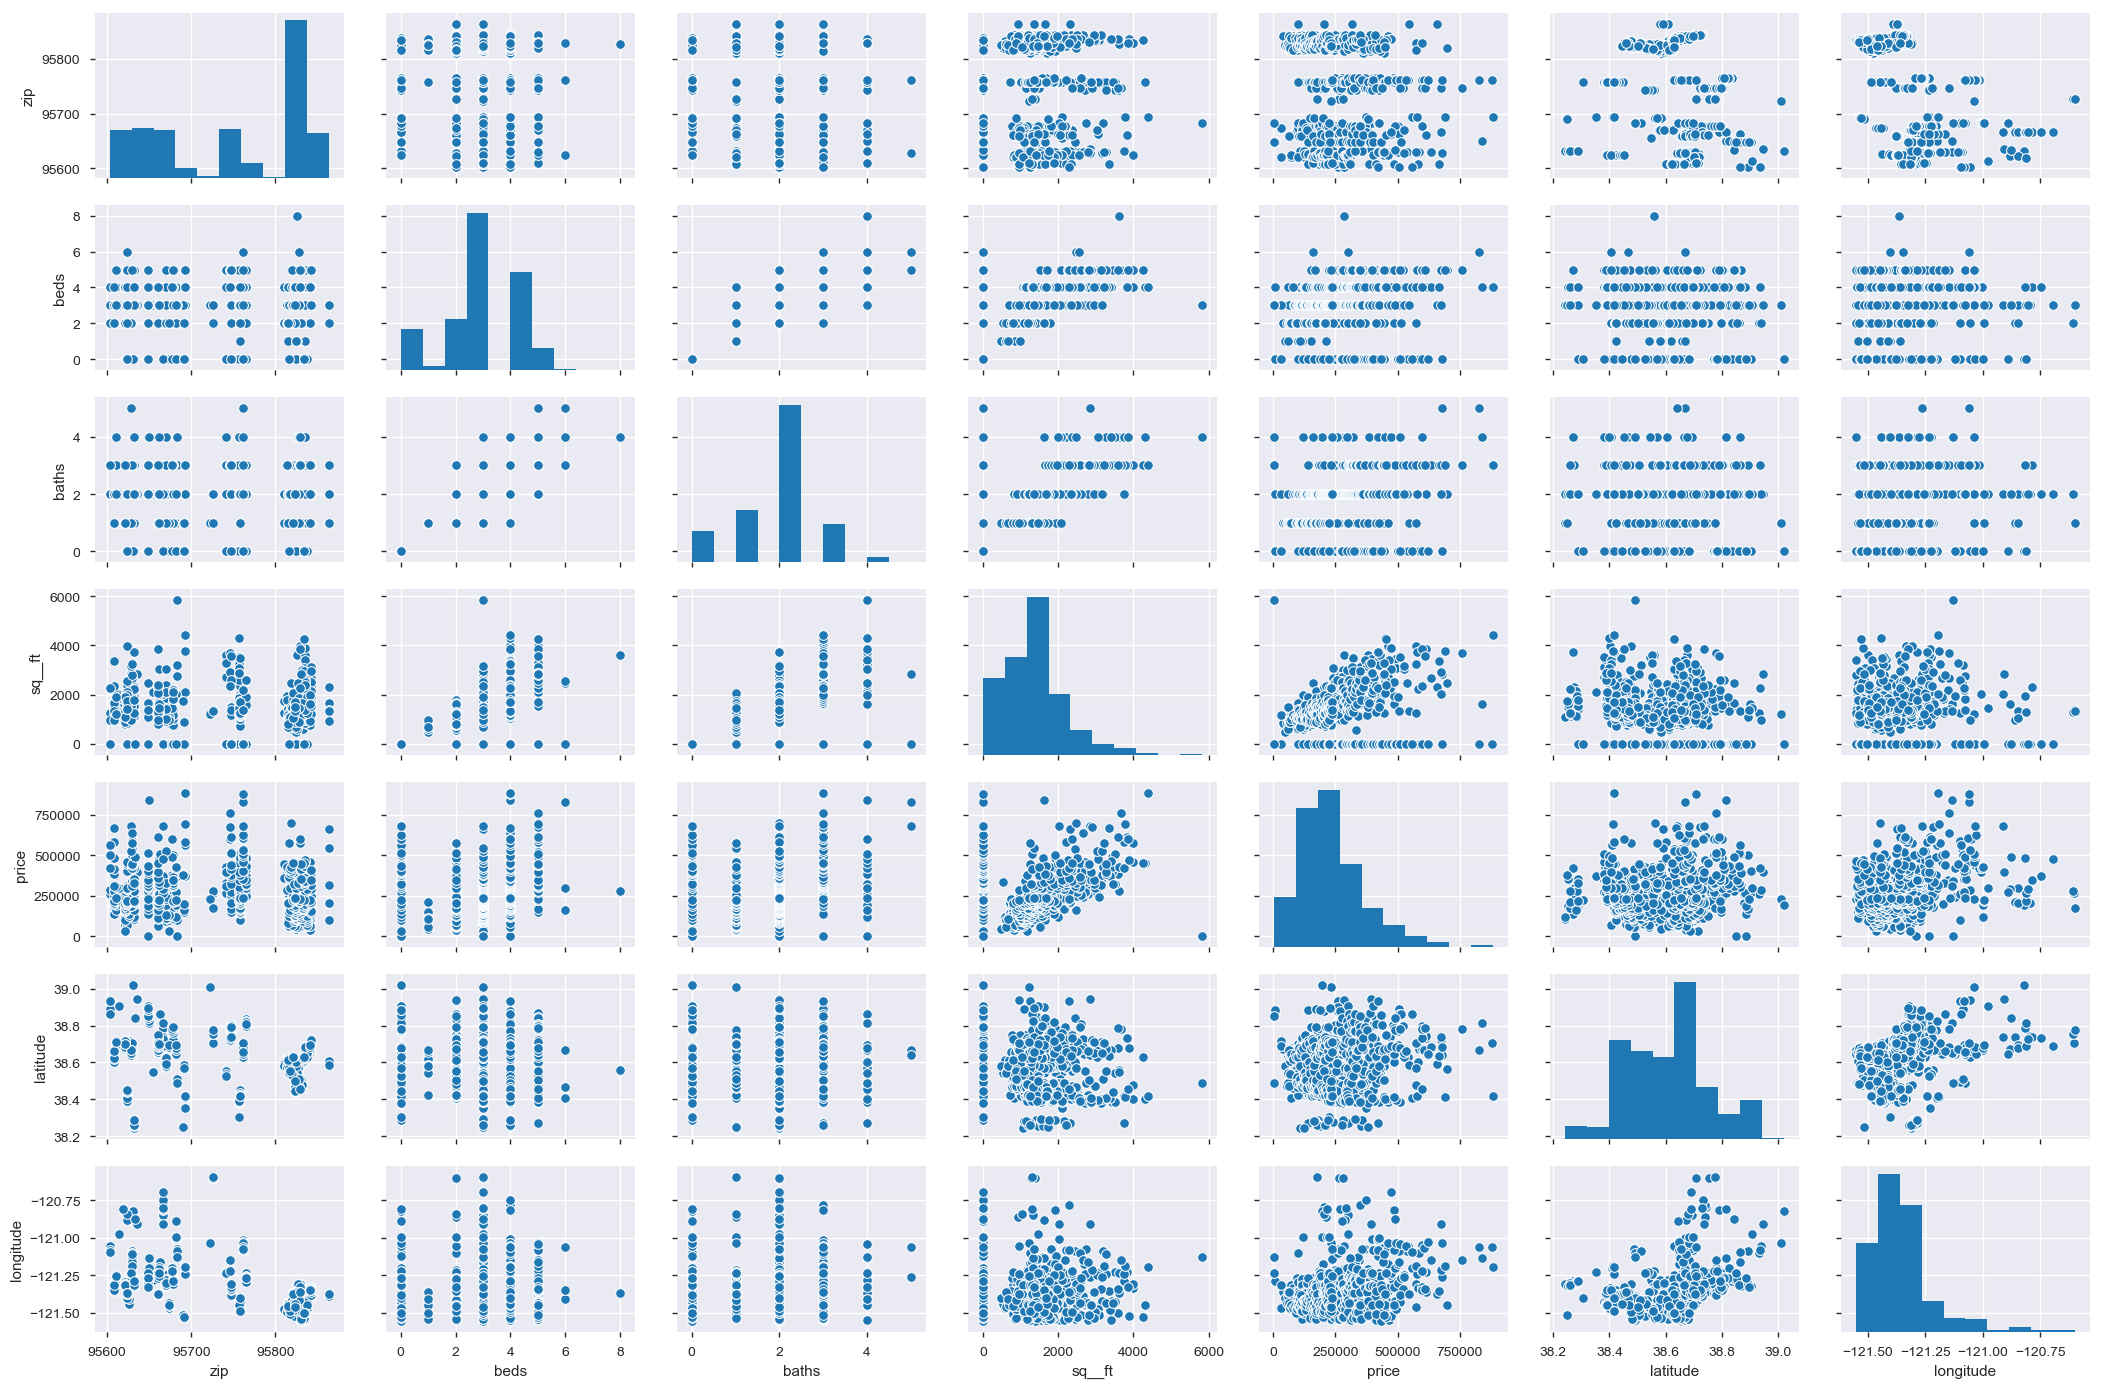

In [5]:
sns.pairplot(df, height = 2, aspect = 1.5)

#### Warnings in Data Profiling

Warnings show that 11% of data in bedsand baths is 0 and 17% in sq_ft


In [234]:
df[(df['state']!='CA')].count()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
geometry     0
dtype: int64

In [329]:
d=df[(df['beds'] !=0) & (df['baths'] !=0)& (df['sq__ft'] !=0)]


In [330]:
d.shape # New DataFrame is obtained by eliminating the 0 which has reduced the data set from 985 rows to 814 rows

(814, 13)

In [331]:
d.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1591.146192,229448.369779,38.577044,-121.378687
std,85.3440,0.852137,0.669804,663.841930,119825.576060,0.126315,0.119736
min,95603.0000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148750.000000,38.473885,-121.451501
50%,95820.0000,3.000000,2.000000,1418.500000,207986.500000,38.591720,-121.405456
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674705,-121.325844
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


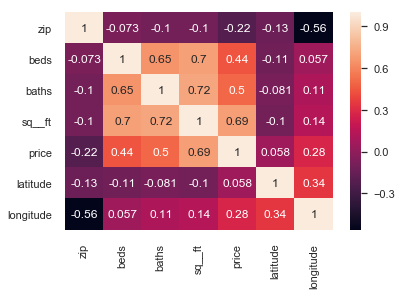

In [332]:
sns.heatmap( d.corr(), annot=True )

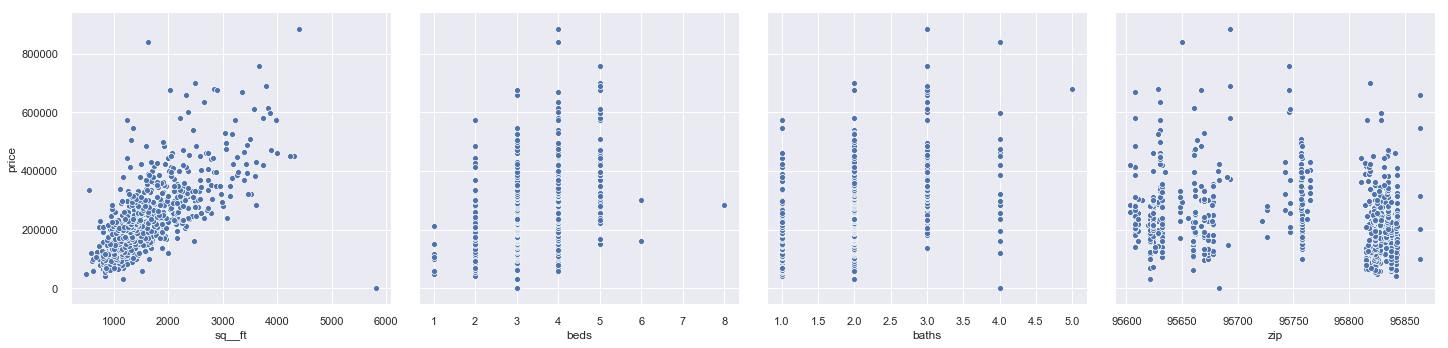

In [333]:
sns.pairplot(d, x_vars=['sq__ft', 'beds', 'baths','zip'], y_vars='price', height=5, aspect=1)

#### Considering the outlier the following commands are executed 

In [334]:
bath5=d[d.baths==5] 
print (bath5)

           street       city    zip state  beds  baths  sq__ft         type  \
332  4128 HILL ST  FAIR OAKS  95628    CA     5      5    2846  Residential   

                        sale_date   price  latitude   longitude  \
332  Tue May 20 00:00:00 EDT 2008  680000  38.64167 -121.262099   

                         geometry  
332  POINT (-121.262099 38.64167)  


In [335]:
sqftgt5000=d[d.sq__ft>5000]
print(sqftgt5000)

             street         city    zip state  beds  baths  sq__ft  \
866  14151 INDIO DR  SLOUGHHOUSE  95683    CA     3      4    5822   

            type                     sale_date  price   latitude   longitude  \
866  Residential  Fri May 16 00:00:00 EDT 2008   2000  38.490447 -121.129337   

                          geometry  
866  POINT (-121.129337 38.490447)  


In [336]:
citysloughhouse=d[d.city=='SLOUGHHOUSE']
print(citysloughhouse)

             street         city    zip state  beds  baths  sq__ft  \
866  14151 INDIO DR  SLOUGHHOUSE  95683    CA     3      4    5822   

            type                     sale_date  price   latitude   longitude  \
866  Residential  Fri May 16 00:00:00 EDT 2008   2000  38.490447 -121.129337   

                          geometry  
866  POINT (-121.129337 38.490447)  


 ## 4.  Linear Regression Model

In [337]:
d1 = pd.DataFrame(d, columns=['price','beds','baths', 'sq__ft','zip'])
d1.head(5)

,price,beds,baths,sq__ft,zip
0,59222,2,1,836,95838
1,68212,3,1,1167,95823
2,68880,2,1,796,95815
3,69307,2,1,852,95815
4,81900,2,1,797,95824


In [338]:
# Step 1 : Import packages and classes
from sklearn.linear_model import LinearRegression # LinearRegression is class from sklearn.linear_model. 
                                                  # It is used to perform linear and polynomial regression
from sklearn import metrics
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(d1)
data1 = scaler.transform(d1)

C:\Users\ChitraDesai\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ChitraDesai\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [339]:
d2=pd.DataFrame(data1)
d2.shape

(814, 5)

In [340]:
d2.columns = ['price','beds','baths','sq__ft','zip']
d2.head()

,price,beds,baths,sq__ft,zip
0,-1.421491,-1.461310,-1.435164,-1.138239,0.897024
1,-1.346420,-0.287069,-1.435164,-0.639319,0.721157
2,-1.340841,-1.461310,-1.435164,-1.198531,0.627361
3,-1.337276,-1.461310,-1.435164,-1.114122,0.627361
4,-1.232117,-1.461310,-1.435164,-1.197024,0.732881


In [341]:
feature_cols = ['beds','baths','sq__ft','zip']              
X = d2[feature_cols] 

In [342]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(814, 4)


In [343]:
y = d2.price
y.head()

0   -1.421491
1   -1.346420
2   -1.340841
3   -1.337276
4   -1.232117
Name: price, dtype: float64

In [344]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(814,)


In [345]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [346]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (651, 4)
y_train shape:  (651,)

Test cases as below
X_test shape:  (163, 4)
y_test shape:  (163,)


In [347]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    
    if not(gridsearch):
        model.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        model = GridSearchCV(model,parameters, cv = 10,refit = True)
        model.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", model.best_score_)  
        
        y_pred_test = model.predict(X_test)  # make predictions on the testing set
        
        # print(y_pred_test)

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return model

In [348]:
model = linear_reg(X,y)

In [349]:

print('Intercept:',model.intercept_)  # f(x)=b0+b1x intercept is b0
print('Slope:', model.coef_)  # coefficient is b1

Intercept: -0.01670722572962194
Slope: [-0.08794634  0.04428408  0.69866106 -0.13088676]


In [350]:

# Get Result 
rsq=model.score(X_train,y_train)
print('coefficient of determination:',rsq)

coefficient of determination: 0.502678299471891


In [351]:
# Predict Response
#print(X_train)
y_train_predict=model.predict(X_train) # you pass the regressor as argument and get corresponding predicted response
# print('Predicted Response:',y_train_predict)

In [352]:
y_train_test=model.predict(X_test)

In [353]:
MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
MAE_test = metrics.mean_absolute_error(y_test, y_train_test)

In [354]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.4819082776560128
MAE for test set is 0.4747026032817123


In [355]:
MSE_train = metrics.mean_squared_error(y_train, y_train_predict)
MSE_test = metrics.mean_squared_error(y_test, y_train_test)

In [356]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.5033816082856652
MSE for test set is 0.45681710389443875


In [357]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_predict))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_train_test))

In [358]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.7094939099708082
RMSE for test set is 0.675882463076561


### RMSE for Model1 with beds, baths,sq_ft and zip
RMSE for training set is 0.7094939099708082
RMSE for test set is 0.675882463076561
### RMSE for Model2 with zip,baths and sq_ft
RMSE for training set is 0.7122312264090156
RMSE for test set is 0.6766164966899428
### RMSE for Model3 with beds,baths and sq_ft
RMSE for training set is 0.721273257861415
RMSE for test set is 0.7064866711009099
### RMSE for Model4 with beds and sq_ft
RMSE for training set is 0.7220749801245747
RMSE for test set is 0.7032321241049609
### RMSE for Model5 with baths and sq_ft
RMSE for training set is 0.723903620246184
RMSE for test set is 0.7080062899231792
###  RMSE for Model6 with only sq_ft
RMSE for training set is 0.724073227145336
RMSE for test set is 0.706345453841187

### Model 1 is with the least RMSE value compared to other models tested for and thus model 1 is recommended.

Futher selecting or discarding any one of the feature from beds,baths, etc has no much significant change in RMSE value

### Linear Regression Model with Grid Search (Model 7)

In [204]:
linear_reg(X,y,True)

Mean cross-validated score of the best_estimator :  0.4767699613184065
RMSE for the test set is 0.45681710389443875


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Model with Grid search has better RSME than model without grid search and thus a better model for prediction for the given data set.